## Distribution Functions

### Table of Contents


In [1]:
from IPython.display import display, Math, Latex
import math
import seaborn as sns
import matplotlib as mpl

import numpy as np
import pandas as pd
from functools import partial
from scipy.special import factorial

#### 1. Discrete Distributions
##### 1.1 Geometric
The geometric distribution is the number of trials needed to get the ﬁrst success, i.e., the
number of Bernoulli events until a success is observed, such as the ﬁrst head when ﬂipping
a coin. It takes values on the positive integers starting with one (since at least one trial is
needed to observe a success).
$$
\begin{aligned}
 & X \sim Geo(p)  \\ 
& P (X = x|p) = p(1 − p)^{x−1} \text{    for x = 1, 2, . . .} \\
& E[X] = \frac{1}{p}
\end{aligned}
$$
If the probability of getting a success is p, then the expected number of trials until the ﬁrst
success is 1/p.

Example: What is the probability that we ﬂip a fair coin four times and don’t see any heads? This is the same as asking what is P (X > 4) where X ∼ Geo(1/2). P (X > 4) = 1 − P (X =
1)−P (X = 2)−P (X = 3)−P (X = 4) = 1−(1/2)−(1/2)(1/2)−(1/2)(1/2)2 −(1/2)(1/2)3 =
1/16. Of course, we could also have just computed it directly, but here we see an example
of using the geometric distribution and we can also see that we got the right answer.

In [34]:
class DistFunctions():
    def __init__(self, n):
        """
        n : maximum trial
        """
        self.n = n

    def ProbFunc(self,f):
        self.func = lambda x: f(x)
        return self.func

    def ProbLinspace(self, X = None):
        # Create Linspace
        if X is None:
            X = np.array(range(1,self.n+1))
        # Mass distribution function
        mass = self.func(X)
        # Cumulative distribution function
        cum = np.empty(mass.shape)
        cum= [sum(mass[:i]) for i in range(self.n) ]

        data = {"x": list(range(1,self.n+1)), "Mass": mass ,"Cum": cum}
        self.df = pd.DataFrame(data)
        return self.df
        
    def MassDist(self):
        "Mass Distribution"

        sns.set(font_scale = 1.2)
        g = sns.relplot(x="x", y="Mass", kind="line", data=self.df)
        g.figure.set_size_inches(9, 6.5)
        return g
    
    def CumDist(self):
        "Cumulative Distribution"
        sns.set(font_scale = 1.2)
        g = sns.relplot(x="x", y="Cum", kind="line", data=self.df)
        g.figure.set_size_inches(9, 6.5)
        return g

In [35]:
class Geometric(DistFunctions):
    def __init__(self,parameter,n):
        """
        p : probability parameter
        n : maximum trial
        """
        DistFunctions.__init__(self,n)
        self.p = parameter

    def GeoProb(self,x):
        return self.p*(1-self.p)**(x-1)
        
    def MeanGeo(self):
        self.mean = 1/self.p
        return
    
    def VarGeo(self):
        self.var = self.p
        return


Text(0.55, 0.99, 'Geometric Mass Distribution for parameter = 0.4')

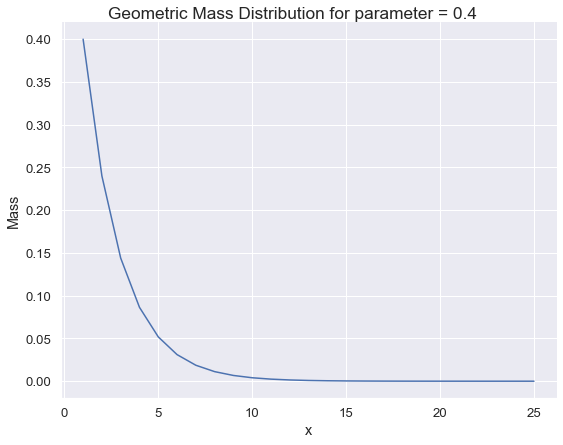

In [37]:
p, n = 0.4,25
geom = Geometric(p, n)
geom.ProbFunc(geom.GeoProb)
geom.ProbLinspace()
g = geom.MassDist()
g.fig.suptitle("Geometric Mass Distribution for parameter = "+ str(p), x=0.55, y=0.99)

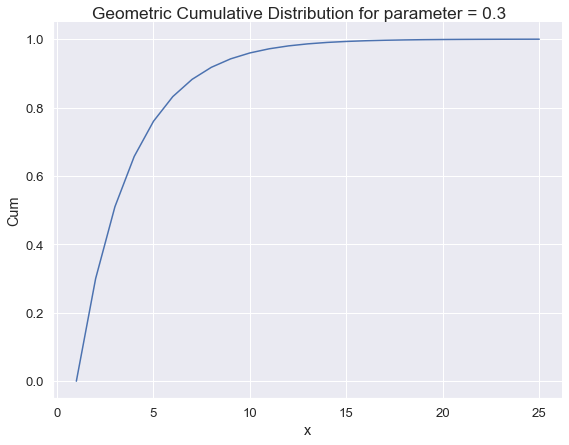

In [128]:
g = geom.CumDist()
g.fig.suptitle("Geometric Cumulative Distribution for parameter = "+ str(p), x=0.55, y=0.99)

##### 1.2 Poisson

The Poisson distribution is used for counts, and arises in a variety of situations. The param-
eter λ > 0 is the rate at which we expect to observe the thing we are counting.
A Poisson process is a process wherein events occur on average at rate λ, events occur one
at a time, and events occur independently of each other.
$$
\begin{aligned}
 & X \sim Pois(\lambda)  \\ 
& P (X = x|\lambda) = \frac{\lambda^{x} exp(−\lambda)}{x!} \text{    for x = 1, 2, . . .} \\
& E[X] = \lambda \\
& Var[X] = \lambda
\end{aligned}
$$
Example: Signiﬁcant earthquakes occur in the Western United States approximately fol-
lowing a Poisson process with rate of two earthquakes per week. What is the probability
there will be at least 3 earthquakes in the next two weeks?

`` Answer: ``

In [16]:

class Poisson(DistFunctions):
    def __init__(self,parameter,n):
        """
        p : lambda
        n : maximum trial
        """
        DistFunctions.__init__(self,n)
        self.p = parameter
        
    def PoisProb(self,x):
        return np.power(self.p,x,dtype=np.int64) * (np.exp(-self.p)) /factorial(x)

    def MeanPois(self):
        self.mean = self.p
        return
    
    def VarPois(self):
        self.var = self.p
        return


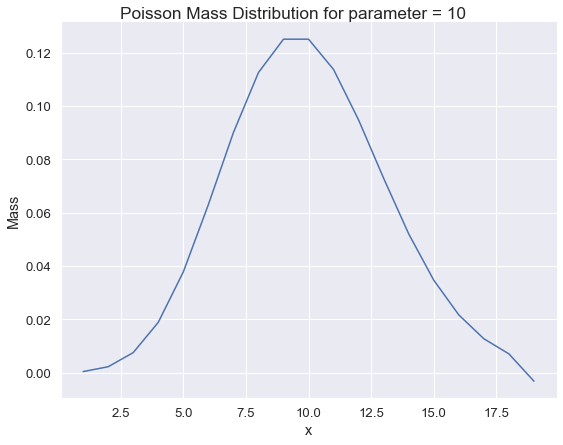

In [17]:
p, n = 10, 19
pois = Poisson(p, n)
pois.ProbFunc(pois.PoisProb)
pois.ProbLinspace()
g = pois.MassDist()
g.fig.suptitle("Poisson Mass Distribution for parameter = "+ str(p), x=0.55, y=0.99)

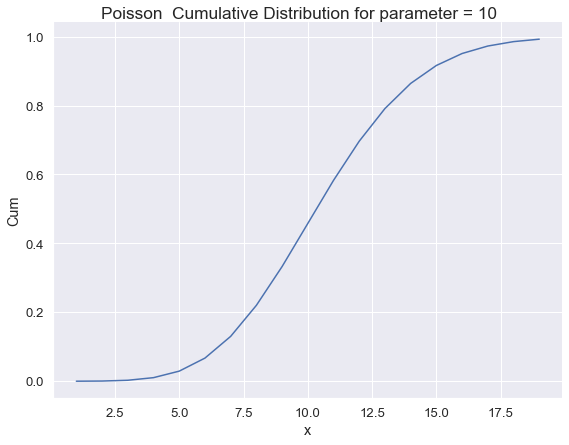

In [18]:
pois.CumDist("Poisson ")

#### 1.3 Binomial Distribution

In [20]:
class Binomial(DistFunctions):
    def __init__(self,parameter,n):
        """
        p : probability parameter
        n : maximum trial
        """
        DistFunctions.__init__(self,n)
        self.p = parameter

    def BinoProb(self,k):
        combination = math.factorial(self.n)/(factorial(k)*factorial(self.n-k))
        return combination * (self.p**k) * (1-self.p)**(self.n-k)

    def MeanBin(self):
        self.mean = self.p* self.n
        return 

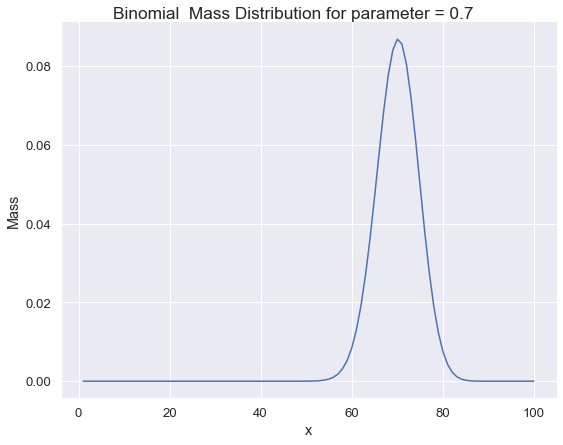

In [23]:
bino = Binomial(0.7, 100)
bino.ProbFunc(bino.BinoProb)
bino.ProbLinspace()
bino.MassDist("Binomial ")

### 2.Continuous Distributions

#### 2.1  Exponential
The exponential distribution is often used to model the waiting time between random events. Indeed, if the waiting times between successive events are independent from an $Exp(\lambda)$
distribution, then for any ﬁxed time window of length t, the number of events occurring in that window will follow a Poisson distribution with mean $t\lambda$
$$
\begin{aligned} 
& X \sim Exp(\lambda) \\
& f(x|\lambda) = \lambda e− \lambda x I\{x≥0\}(x) \\
& E[X] = \frac{1}{\lambda} \\
& Var[X] = \frac{1}{\lambda^2}
\end{aligned}
$$


#### 2.2 Gamma
If X1, X2, . . . , Xn are independent (and identically distributed $Exp(\lambda)$ waiting times between successive events, then the total waiting time for all n events to occur $Y = \sum_{i}^{n} X_i $ will follow a gamma distribution with shape parameter $ \alpha = n $ and rate parameter $\beta = λ$

#### 2.3  Uniform

The uniform distribution is used for random variables whose possible values are equally likely over an interval. If the interval is $(a, b)$, then the uniform probability density function (PDF)
$f(x)$ is ﬂat for all values in that interval and 0 everywhere else.

$$
\begin{aligned}
& X \sim Uniform(a, b) \\
& f(x|a, b) = \frac{1}{(b - a)} I_{\{0<x<1\}}(x) \\
& E[X] = \frac{a + b}{2} \\
& Var[X] = \frac{(b- a)^2}{12} \\
\end{aligned}
$$

#### 2.4  Beta
The beta distribution is used for random variables which take on values between 0 and 1.
For this reason (and other reasons we will see later in the course), the beta distribution is
commonly used to model probabilities.

$$
\begin{aligned}
& X \sim Beta(\alpha, \beta) \\
& f(x|\alpha, \beta) = \frac{\Gamma (\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha -1} (1 − x)^{(\beta−1)} I_{\{0<x<1\}}(x) \\
& E[X] = \frac{\alpha}{\alpha + \beta} \\
& Var[X] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)} \\
\end{aligned}
$$
where $\Gamma(·)$ is the gamma function introduced with the gamma distribution. Note also that $\alpha > 0$ and $\beta > 0 $ The standard Uniform(0, 1) distribution is a special case of the beta
distribution with $\alpha = \beta = 1 $.

In [39]:
from math import factorial as mfac

class Beta(DistFunctions):
    def __init__(self,alpha, beta, n):
        super().__init__(n)
        self.alpha = alpha
        self.beta = beta

    def BetaLikelihood(self,x):
        return mfac(self.alpha + self.beta)/(mfac(self.alpha) * mfac(self.beta)) * x**(self.alpha-1) * (1-x)**(self.beta-1)
    
    def BetaMean(self):
        return
    
    def BetaVar(self):
        return


Text(0.55, 0.99, 'Poisson Mass Distribution for alpha = 2 beta = 5')

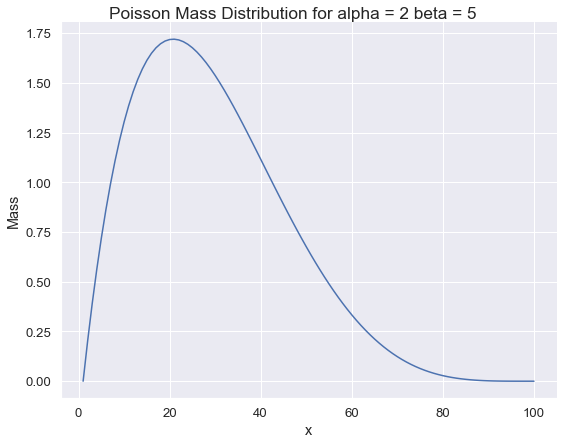

In [42]:
a, b , n = 2,5,100
beta = Beta(a, b , n)
beta.ProbFunc(beta.BetaLikelihood)
beta.ProbLinspace(X = np.linspace(0,1,n))
g= beta.MassDist()
g.fig.suptitle("Poisson Mass Distribution for alpha = "+ str(a)+ " beta = "+str(b), x=0.55, y=0.99)